# Проект "Анализ авторынка Казахстана"

Для анализа представлен датасет с данными по продажам автомобилей в Казахстане за 2019 год. Данные получены из официальной статистики VAG, после перевода из эксель в csv обнаружились множественные проблемы с исходными данными. Необходимо провести предобработку данных, исследовать рынок автомобилей Казахстана и рассмотреть долю рынка автодилера Mercur Auto и дать соответсвующие рекомендации по увеличению доли.

## Загрузка данных

In [1]:
# импорт необходимых библиотек

import pandas as pd
import datetime as dt
import seaborn as sns
import math as mth
import numpy as np
import squarify 
import matplotlib.pyplot as plt
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()


In [2]:
data = pd.read_csv("C://Users//Вероника//Downloads//kz_2019_final.csv", index_col = 0, decimal = ',', encoding = 'utf-8')

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#полный вид строк и столбцов
pd.options.display.max_rows = 100
pd.options.display.max_columns = 50

pd.options.mode.chained_assignment = None

## Предобработка данных

In [4]:
#функция с кратким описанием датасета
def basic_information(df):
    print('Общая информация о датафрейме:')
    print(df.info())
    print('********************************')
    print('Первые 5 строк датафрейма:')
    print(df.head())
    print('********************************')
    print('Количество пропусков в датафрейме:')
    print(df.isna().sum())
    print('********************************')
    print('Количество дубликатов в датафрейме:')
    print(df.duplicated().sum())

In [5]:
basic_information(data)

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32854 entries, 0 to 32853
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Год                             32854 non-null  int64 
 1   Месяц                           32854 non-null  object
 2   Компания                        32854 non-null  object
 3   Бренд                           32854 non-null  object
 4   Модель                          32854 non-null  object
 5   Модификация                     29729 non-null  object
 6   Год выпуска                     32700 non-null  object
 7   Страна-производитель            32854 non-null  object
 8   Вид топлива                     31942 non-null  object
 9   Объём двиг, л,                  30968 non-null  object
 10  Коробка передач                 31662 non-null  object
 11  Тип привода                     30589 non-null  object
 12  Сегмент        

В данном датасете обнаружено большое количество пропусков, неверные типы данных и неявные дубликаты

Для начала удалим лишние столбцы, которые содержат большое количество пропусков и не будут влиять на результаты анализа.

In [6]:
data.drop(['Модификация', 'Сегмент', 'Наименование дилерского центра', 'Тип клиента', 'Форма расчета', \
           'Область', 'Локализация производства', 'Сегментация Eng'], axis= 1 , inplace= True)

Переведем названия столбцов и переименуем их в соответствие со змеиным регитсром

In [7]:
data.columns = ['year', 'month', 'company', 'brand', 'model', 'year_of_release', 'country', 'fuel_type', 'volume_engine',\
               'gearbox', 'gearing', 'region', 'quantity', 'price_usd', 'really_price', 'segment_2013', 'class_2013']

Проверка

In [8]:
data.head()

,year,month,company,brand,model,year_of_release,country,fuel_type,volume_engine,gearbox,gearing,region,quantity,price_usd,really_price,segment_2013,class_2013
0,2019,Март,Mercur Auto,Audi,A3,2017,Германия,Бензин,1.4,S-tronic,NaN,Алматы,1.0,31250.0,31250.0,Легковые автомобили,C класс
1,2019,Май,Mercur Auto,Audi,A3,2018,Германия,Бензин,1.4,S-Тronic,FWD,Алматы,1.0,30581.0,30581.0,Легковые автомобили,C класс
2,2019,Июнь,Mercur Auto,Audi,A3,2018,Германия,Бензин,1.4,S-Тroic,FWD,Алматы,1.0,35087.719,35087.719,Легковые автомобили,C класс
3,2019,Июль,Mercur Auto,Audi,A3,2017,Германия,Бензин,1.4,S-troic,передний,Алматы,1.0,26608.232900297386,26608.232900297386,Легковые автомобили,C класс
4,2019,Июль,Mercur Auto,Audi,A4,2017,Германия,Бензин,2,S-troic,quattro,Алматы,1.0,48343.98264845536,48343.98264845536,Легковые автомобили,D класс


Проверим количество пропусков в датасете

In [9]:
data.isna().sum()

year                  0
month                 0
company               0
brand                 0
model                 0
year_of_release     154
country               0
fuel_type           912
volume_engine      1886
gearbox            1192
gearing            2265
region                0
quantity              5
price_usd             0
really_price          0
segment_2013          0
class_2013            0
dtype: int64

### Удаление пропусков

Удалим строки с пропусками

In [10]:
new_data = data.dropna(subset = ['fuel_type', 'volume_engine', 'gearbox', 'gearing', 'quantity', 'year_of_release'])
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30214 entries, 1 to 32853
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             30214 non-null  int64 
 1   month            30214 non-null  object
 2   company          30214 non-null  object
 3   brand            30214 non-null  object
 4   model            30214 non-null  object
 5   year_of_release  30214 non-null  object
 6   country          30214 non-null  object
 7   fuel_type        30214 non-null  object
 8   volume_engine    30214 non-null  object
 9   gearbox          30214 non-null  object
 10  gearing          30214 non-null  object
 11  region           30214 non-null  object
 12  quantity         30214 non-null  object
 13  price_usd        30214 non-null  object
 14  really_price     30214 non-null  object
 15  segment_2013     30214 non-null  object
 16  class_2013       30214 non-null  object
dtypes: int64(1), object(16)
memory 

### Кодировка стран в alpha3

Создаем датасет с кодами стран путем загрузки данных с сайта Лебедева, одновременно переименуя столбцы на английский язык для удобства

In [11]:
countries_codes = (pd.read_html('https://www.artlebedev.ru/country-list/', encoding='utf8')\
                   [0][['Наименование', 'Полное наименование', 'Alpha3']]\
 .rename(columns={'Наименование':'name', 'Полное наименование':'full_name'}))

Проверим корректность выгруженного датасета

In [12]:
countries_codes.head()

,name,full_name,Alpha3
0,Абхазия,Республика Абхазия,ABH
1,Австралия,NaN,AUS
2,Австрия,Австрийская Республика,AUT
3,Азербайджан,Республика Азербайджан,AZE
4,Албания,Республика Албания,ALB


Создаем словарь для замены названий стран на коды Alpha3. Ключи - названия стран, значения - коды. 

In [13]:
countries_codes_dict = {}
for i in range(len(countries_codes)):
    if countries_codes.loc[i]['name'] not in countries_codes_dict:
        countries_codes_dict[countries_codes.loc[i]['name']] = countries_codes.loc[i]['Alpha3']
    if countries_codes.loc[i]['full_name'] not in countries_codes_dict:
         countries_codes_dict[countries_codes.loc[i]['full_name']] = countries_codes.loc[i]['Alpha3']

Производим замену по словарю и проверяем корректность замены

In [14]:
new_data.country = new_data.country.apply(lambda cell: countries_codes_dict.get(cell, cell))

In [15]:
new_data.country.unique()

array(['DEU', 'США', 'KAZ', 'RUS', 'Белоруссия', 'TUR', 'JPN', 'Корея',
       'VNM', 'UK', 'THA', 'UZB', 'AUT', 'NLD', 'HUN', 'SWE'],
      dtype=object)

Три страны не изменились, поэтому создадим словарь, по которому были произведены замены и закодируем оставшиеся страны.

In [16]:
codes_dict_new = countries_codes_dict

codes_dict_new['Белоруссия'] = codes_dict_new.pop('Беларусь')
codes_dict_new['США'] = codes_dict_new.pop('Соединенные Штаты')
codes_dict_new['Корея'] = codes_dict_new.pop('Корея, Республика')

Применим дополнительную кодировку и корректность применения.

In [17]:
new_data.country = new_data.country.apply(lambda cell: codes_dict_new.get(cell, cell))
new_data.country.unique()

array(['DEU', 'USA', 'KAZ', 'RUS', 'BLR', 'TUR', 'JPN', 'KOR', 'VNM',
       'UK', 'THA', 'UZB', 'AUT', 'NLD', 'HUN', 'SWE'], dtype=object)

### Кодировка типов топлива

Закодируем тип топлива, для этого сначала посмотрим уникальные значения в этом столбце.

In [18]:
new_data['fuel_type'].unique()

array(['Бензин', 'Дизель', 'гибрид', 'Электрический', 'дизель ',
       'Газовый'], dtype=object)

Приведем тип топлива "Дизель" в единый формат

In [19]:
new_data.fuel_type[new_data.fuel_type=='дизель '] = 'Дизель'

Напишем словарь для кодировки и применим его к данному столбцу

In [20]:
#словарь для кодировки видов двигателя
fuel_code = {'Бензин' : 'F',
             'гибрид' : 'HYB',
             'Электрический' : 'E',
             'Дизель': 'D',
             'Газовый' : 'H'
}

In [21]:
new_data['fuel_type'] = new_data['fuel_type'].map(fuel_code)

Проверим корректность кодировки

In [22]:
new_data['fuel_type'].unique()

array(['F', 'D', 'HYB', 'E', 'H'], dtype=object)

Изменим тип данных на категориальный

In [23]:
new_data['fuel_type'] = new_data['fuel_type'].astype('category')

### Удаляем неявные дубликаты в столбце 'тип привода'

Следующим этапом приведем типы приводов к единому формату: 

- Передний привод - FWD 
- Задний привод - RWD 
- Полный привод - 4WD
- Переключаемый привод - 2WD

In [24]:
#Функция удаления неявных дубликатов в столбце Тип привода
def encode(cell):
    if cell in ['4WD', 'quattro', 'Полный', 'полный', 'AWD', '4 WD', '4Motion', '4WD', 'Quattro', '4x4', 'Полный ', '4х4', 'CVT']:
        return '4WD' #полный привод
    elif cell in ['передний', 'FWD', 'Передний', 'Передний (FF)', 'FF', 'FWD', 'передний ', '0' ]:
        return 'FWD' #передний привод
    elif cell in ['Задний', 'RWD', 'задний', 'FR', ' -', '-']:
        return 'RWD' #задний привод
    elif cell in ['4х2.2', '4х2', '2х4', '2 WD', '2WD', '4x2', 'P/TIME']:
        return '2WD' #подключаемый привод

    
new_data['gearing'] = new_data['gearing'].apply(encode)  

Проверим корректность применения функции

In [25]:
new_data['gearing'].unique()

array(['FWD', '4WD', 'RWD', '2WD'], dtype=object)

Изменим тип данных на категориальный

In [26]:
new_data['gearing'] = new_data['gearing'].astype('category')

### Кодировка коробки передач

Следующим этапом закодируем тип коробки передач
* Механическая КП - МТ
* Автоматическая КП - АТ
* Роботизированная КП - АМТ
* Вариатор - CVT

In [27]:
#Функция удаления неявных дубликатов в столбце Коробка передач
def encode_tr(cell):
    if cell in ['S-tronic', 'S-Тronic', 'S-Тroic', 'S-troic', 'Steptronic', 'ТipТronic', 'Tiptronic', 'SТepТronic', \
                'Powershift S6', 'PowershiftS6', 'PowershifТS6', '7DCT', '7 DCT', '7DCТ', 'AMT','7 DSG', '7DSG', '6 DSG',\
                '6DSG', 'PDK', '7DSG4МoТion']:
        return 'AMT' #робот
    elif cell in ['Автомат', 'AT', '6 АТ', '6AT', '6АТ', '6 AT', 'АТ', '6АT', '8АТ', '5AT','5АТ', '4АТ', '8 АТ', '8AT', '4 АТ', '4AT'\
                  'АКПП6', 'АКПП4', '9AT', 'АКПП', 'АКПП8', '9АТ', '12AT', '7AT', '8АКПП','8-ступ АКПП', '8', 'АТ (автомат)',\
                  '8 AT 4Motion', '8АТ4МoТion', '6A', '6-ступАКПП', '6А', 'AT (автомат)', '6Aвтомат', '6Aатомат', 'АT', 'A/T',\
                  '7АT', 'AMT', '6AT/MT', '4AT']:
        return 'AT' #автомат
    elif cell in ['5 МТ', '5MT', '5МТ', 'MT','6MT', '6МТ', 'MT', 'МТ', 'MТ', '6MТ', 'Мех.', 'МКПП', '6 MT', '6 МТ','МКПП4', 'МКПП5',\
                '7АТ', '6М/Т', '6M/T', '6M/Т', '8', ' -', '-', '5MТ', '5M', '5М', '5-ступМТ', 'МТ (механика)', 'Механическая', '0']:
        return 'MT' #змеханика
    elif cell in ['CVT', 'CVT(вариатор)', 'CVТ',  'CVT (вариатор)', 'CVT(вариATор)', 'CVТ(вариатор)', 'CVТ(вАриАтор)', 'N']:
        return 'CVT'
    
new_data['gearbox'] = new_data['gearbox'].apply(encode_tr)
  

Проверим корректность кодировки

In [28]:
new_data['gearbox'].unique()

array(['AMT', 'AT', 'MT', 'CVT'], dtype=object)

Изменим тип данных на категориальный

In [29]:
new_data['gearbox'] = new_data['gearbox'].astype('category')

### Приведение года выпуска к единому формату

In [30]:
new_data['year_of_release'].unique()

array(['2018', '2017', '2016', '2011', '2015', '2014', '2013', '2\xa0018',
       '2\xa0017', '2\xa0016', 2018, 2017, 2016], dtype=object)

Исправим некорректное заполнение года выпуска

In [31]:
new_data['year_of_release'] = new_data['year_of_release'].replace('2\xa0018', 2018)
new_data['year_of_release'] = new_data['year_of_release'].replace('2\xa0017', 2017)
new_data['year_of_release'] = new_data['year_of_release'].replace('2\xa0016', 2016)

Приведем тип данных к целочисленному типу.

In [32]:
new_data['year_of_release'] = new_data['year_of_release'].astype(int)

Проверка исправления

In [33]:
new_data['year_of_release'].unique()

array([2018, 2017, 2016, 2011, 2015, 2014, 2013])

### Удалим аномалии в столбце с объемом двигателя

In [34]:
new_data['volume_engine'].unique()

array(['1.4', '2', '3', '1.5', '4.4', '6.6', '0', '1.8', '1.596', '1596',
       '2.4', '3000', '2400', '1.7', '6.2', '1800', '1400 turbo',
       '1,4 Turbo', '2.5', '1.6', '3.5', '2.2', '2.7', '2.8', '4.2', '5',
       '3.9', '7.5', '11', '3.933', '12.3', '1,6 T-GDI', '3.7', '5.6',
       '10.3', '8.7', '1600', '1.998', '1.598', '1.248', '2.359', '2359',
       '1999', '3.8', '3800', '1.591', '1.368', '3.342', '3.47', '3470',
       '2000', '1.999', '1.69', '1690', '1.774', '1598', '1774', '4.6',
       '3,5', '5.7', '10.5', '4', '12', '1.2', '3.6', '6.5', '5.5', '4.5',
       '1.25', '1.3', '0.002', '0.0016', '1998', '13', '16', '1400',
       '2.3', '1.33', '2,4G', '2.693', '2693', '2.235', '2235', '2.0',
       '14860', '14.8', '6.7', '1,2T', '4.88', '4.0'], dtype=object)

Напишем функцию для замены запятой на точку, удаления лишних символов и приведения к другому типу данных

In [35]:
def clean_engine(column):

    column = column.astype(str).str.replace(',', '.', regex=True)  # замена запятой на точку
    column = column.str.replace('[a-zA-Z-]+$', '', regex=True)  # удаление буквенных символов в конце ячейки
    column = column.astype(float)  # приведение к числовому типу данных
    column = column.apply(lambda x: float("{:.1f}".format(x))) 
    return column

new_data['volume_engine'] = clean_engine(new_data['volume_engine'])

Напишем цикл для обработки аномальных значений

In [36]:
for index, row in new_data.iterrows():
    if row['volume_engine'] < 1:
        new_data.at[index, 'volume_engine'] = 10 * row['volume_engine']
    elif row['volume_engine'] > 100 and row['volume_engine'] < 10000:
        new_data.at[index, 'volume_engine'] =  row['volume_engine'] / 1000
    elif row['volume_engine'] > 10000 :
        new_data.at[index, 'volume_engine'] =  row['volume_engine'] / 1000
    else: 
        row['volume_engine']

Заменим нулевые значения значением 1.6, так как представленные автомобили поставляются в основном именно с таким объемом двигателя

In [37]:
new_data.volume_engine[new_data.volume_engine == 0] = 1.6

Округлим все значения до одного знака после запятой

In [38]:
new_data['volume_engine'] = new_data['volume_engine'].map(lambda x: round(x, 1))

### Удалим неявные дубликаты в столбце с названием компаний

In [39]:
new_data['company'].unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Sivi Finance Consulting', 'Eurasia Motor Premium',
       'Daewoo Bus Kazakhstan', 'Caspian Motors', 'Каспиан Моторс',
       'ТК Рос-Авто', 'Astana Motors', 'Hyundai Com Trans Kazakhstan ',
       'Nissan Manufacturing RUS', 'СВС', 'Allur Auto',
       'Jaguar Land Rover', 'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'Autokapital', 'MMC RUS', 'ММС Рус', 'УзАвто-Казахстан',
       'Renault Россия', 'Алматы АТО', 'Scania Central Asia',
       'Subaru Kazakhstan', 'SMC', 'Scandinavian Motors',
       'Хино Моторс Казахстан', 'Hino Motors Kazakhstan'], dtype=object)

In [40]:
new_data['company'] = new_data['company'].replace('Caspian Motors', 'Каспиан Моторс')
new_data['company'] = new_data['company'].replace('Hino Motors Kazakhstan', 'Хино Моторс Казахстан')
new_data['company'] = new_data['company'].replace('MMC RUS', 'ММС Рус')

In [41]:
new_data['company'].unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Sivi Finance Consulting', 'Eurasia Motor Premium',
       'Daewoo Bus Kazakhstan', 'Каспиан Моторс', 'ТК Рос-Авто',
       'Astana Motors', 'Hyundai Com Trans Kazakhstan ',
       'Nissan Manufacturing RUS', 'СВС', 'Allur Auto',
       'Jaguar Land Rover', 'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'Autokapital', 'ММС Рус', 'УзАвто-Казахстан', 'Renault Россия',
       'Алматы АТО', 'Scania Central Asia', 'Subaru Kazakhstan', 'SMC',
       'Scandinavian Motors', 'Хино Моторс Казахстан'], dtype=object)

### Предобработка столбцов, с данными о ценах

Приведем столбцы с ценами к целочисленному типу

In [42]:
# Удаляем десятичную часть
new_data['price_usd'] = new_data['price_usd'].str.split('.').str[0]
# Преобразуем столбец в тип данных int
new_data['price_usd'] = new_data['price_usd'].astype(int)

In [43]:
# Удаляем десятичную часть
new_data['really_price'] = new_data['really_price'].str.split('.').str[0]
# Преобразуем столбец в тип данных int
new_data['really_price'] = new_data['really_price'].astype(int)

Посмотрим аномалии в данных столбцах, построив ящик с усами

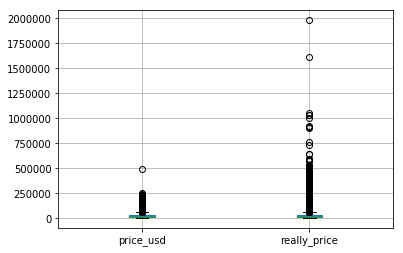

In [44]:
new_data.boxplot(column=['price_usd', 'really_price'])

Видно, что в столбце с реальной ценой есть выбросы

In [45]:
new_data.query('really_price > 1500000')

,year,month,company,brand,model,year_of_release,country,fuel_type,volume_engine,gearbox,gearing,region,quantity,price_usd,really_price,segment_2013,class_2013
962,2019,Май,Daewoo Bus Kazakhstan,Daewoo,BS 106 A,2018,KAZ,D,2.5,MT,2WD,Атырау,20.0,99046,1980922,Коммерческие автомобили,Большие автобусы
32215,2019,Сентябрь,Daewoo Bus Kazakhstan,Daewoo,ВС 211 МА,2018,KAZ,D,2.5,MT,2WD,Атырау,16.0,100879,1614072,Коммерческие автомобили,Большие автобусы


Компания приобрела несколько автобусов, в таком случае данные кажутся объективными

### Преобразование типов оставшихся столбцов

##### Количество

In [46]:
# Удаляем десятичную часть
new_data['quantity'] = new_data['quantity'].str.split('.').str[0]
# Преобразуем столбец в тип данных int
new_data['quantity'] = new_data['quantity'].astype(int)

##### Сегменты и категории

In [47]:
new_data['segment_2013'] = new_data['segment_2013'].astype('category')
new_data['class_2013'] = new_data['class_2013'].astype('category')

### Создадим единый столбец с данными о дате продажи автомобиля

In [48]:
new_data['month'].unique()

array(['Май', 'Июнь', 'Июль', 'Январь', 'Февраль', 'Март', 'Апрель',
       'Август', 'Сентябрь'], dtype=object)

In [49]:
monthsnum = {'Январь' : 1,
             'Февраль' : 2,
             'Март' : 3,
             'Апрель' : 4,
             'Май' : 5,
             'Июнь' : 6,       
             'Июль' : 7,             
             'Август' : 8,             
             'Сентябрь' : 9,
             'Октябрь' : 10,
             'Ноябрь' : 11,
             'Декабрь' : 12    
}

In [50]:
new_data['month'] = new_data['month'].map(monthsnum)

In [51]:
new_data['date'] = pd.to_datetime(new_data[['year', 'month']].assign(day = 28))

Удалим столбцы с годом и месяцем

In [52]:
new_data.drop(['year', 'month'], axis= 1, inplace=True)

### Проверка предобработки

In [53]:
random_rows = new_data.sample(n=7)
random_rows

,company,brand,model,year_of_release,country,fuel_type,volume_engine,gearbox,gearing,region,quantity,price_usd,really_price,segment_2013,class_2013,date
30681,Вираж,UAZ,3909,2017,RUS,F,2.7,MT,4WD,Кызылорда,1,14686,14686,Коммерческие автомобили,Развозные автомобили,2019-03-28
4279,Astana Motors,Hyundai,Accent,2018,KAZ,F,1.6,AT,2WD,Астана,1,15366,15366,Легковые автомобили,B класс,2019-07-28
16234,Nissan Manufacturing RUS,Nissan,Juke,2017,UK,F,1.6,CVT,FWD,Алматы,1,22167,22167,Внедорожники,Компактные SUV,2019-01-28
4745,Astana Motors,Hyundai,Creta,2018,KAZ,F,1.6,AT,2WD,Актау,1,20548,20548,Внедорожники,Субкомпактные SUV,2019-03-28
14485,Toyota Motor Kazakhstan,Lexus,LX,2018,JPN,F,5.7,AT,4WD,Актау,1,124821,124821,Внедорожники,Полноразмерные SUV,2019-06-28
22483,Toyota Motor Kazakhstan,Toyota,Camry,2018,RUS,F,2.5,AT,FWD,Астана,1,36083,36083,Легковые автомобили,E класс,2019-05-28
945,БИПЭК АВТО,Chevrolet,Tracker,2018,KAZ,F,1.8,AT,4WD,Алматы,3,17800,53400,Внедорожники,Субкомпактные SUV,2019-06-28


In [54]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30214 entries, 1 to 32853
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   company          30214 non-null  object        
 1   brand            30214 non-null  object        
 2   model            30214 non-null  object        
 3   year_of_release  30214 non-null  int32         
 4   country          30214 non-null  object        
 5   fuel_type        30214 non-null  category      
 6   volume_engine    30214 non-null  float64       
 7   gearbox          30214 non-null  category      
 8   gearing          30214 non-null  category      
 9   region           30214 non-null  object        
 10  quantity         30214 non-null  int32         
 11  price_usd        30214 non-null  int32         
 12  really_price     30214 non-null  int32         
 13  segment_2013     30214 non-null  category      
 14  class_2013       30214 non-null  categ

Проверим процент потерянных данных

In [55]:
lose = (data['company'].count() - new_data['company'].count())*100/data['company'].count()
round(lose, 2)

8.04

###### Вывод:  
Была выполнена предобработка датасета, в ходе которой были удалены столбцы, не влиящие на анализ, приведены названия столбцов к английским названиям, удалены пропуски. Также для удобства были закодированы страны, тип топлива, коробка передач, тип привода, создан дополнительный столбец с датой покупки, типы данных приведены к необходимым. Данные с объемом двигателя были унифицированы. Также были удалены неявные дубликаты в столбцах с названием компании и годом выпуска. Потери при удалении пропусков составили 8%, что является приемлимым.

# Исследовательский анализ данных

### Анализ рынка

#### Топовые марки на рынке Казахстана: в денежном и натуральном выражении (5-10 марок)

In [56]:
brand_top_5 = new_data.pivot_table(index = 'brand', values = 'quantity', aggfunc = 'sum')
brand_top_5.columns = ['Количество проданных машин']
brand_top_5 = brand_top_5.sort_values(by = 'Количество проданных машин', ascending = False)
brand_top_5 = brand_top_5.head()
brand_top_5

,Количество проданных машин
brand,
Lada,9638
Toyota,9374
Hyundai,5703
GAZ,2111
Kia,1815


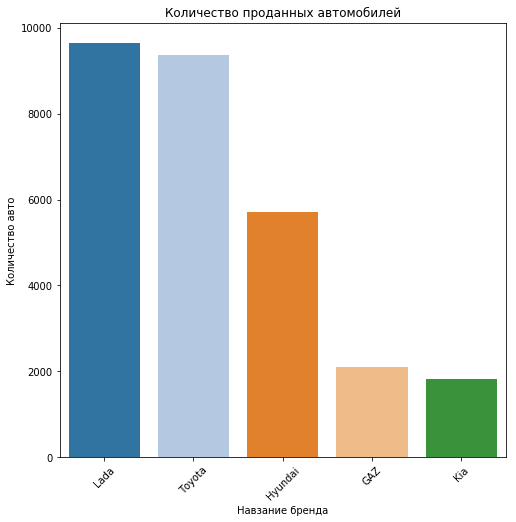

In [57]:
plt.figure(figsize=(8,8))
colors = sns.color_palette('tab20')
sns.barplot(x = brand_top_5.index, y = 'Количество проданных машин', data=brand_top_5, palette=colors)
plt.xticks(rotation=45)
plt.title('Количество проданных автомобилей')
plt.xlabel('Навзание бренда')
plt.ylabel('Количество авто')
plt.show()

In [58]:
brand_top_5_usd = new_data.pivot_table(index = 'brand', values = 'really_price', aggfunc = 'sum')
brand_top_5_usd.columns = ['Сумма']
brand_top_5_usd = brand_top_5_usd.sort_values(by = 'Сумма', ascending = False)
brand_top_5_usd = brand_top_5_usd.head(5)
brand_top_5_usd

,Сумма
brand,
Toyota,383870499
Hyundai,124844281
Lada,93870615
Lexus,83284417
GAZ,40419557


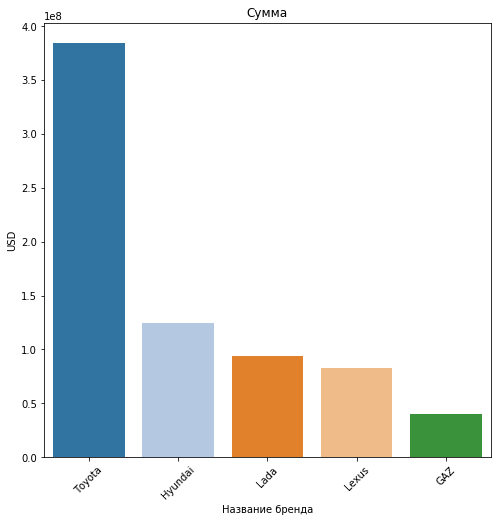

In [59]:
plt.figure(figsize=(8,8))
colors = sns.color_palette('tab20')
sns.barplot(x = brand_top_5_usd.index, y = 'Сумма', data=brand_top_5_usd, palette=colors)
plt.xticks(rotation=45)
plt.title('Сумма')
plt.xlabel('Название бренда')
plt.ylabel('USD')
plt.show()

Лидером на рынке Казахстана в натуральном выражении являются автомобили Lada, в денежном выражении - автомобили марки Toyota. Также в топ-5 марок входят Hyundai, GAZ, Lada. Lexus в топе в денежном выражении, а Kia в натуральном выражении.

#### Продажи на рынке Казахстана всех марок в денежном и натуральном выражении

In [60]:
total_count = new_data['quantity'].sum()
total_count

40738

In [61]:
total_sum = new_data['really_price'].sum()
total_sum

1025943485

За 2019 год в Казахстане было продано 40738 автомобилей на сумму 1025943485 $

#### Динамика продаж в целом по рынку: в денежном и натуральном выражении (помесячно)

In [62]:
qty_gr = new_data.groupby('date')['quantity'].agg('sum').reset_index()

Text(0,0.5,'Количество автомобилей')

<Figure size 720x2880 with 0 Axes>

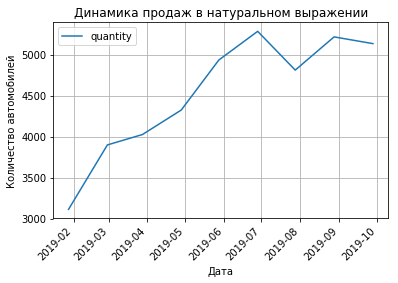

In [63]:
plt.figure(figsize=(10,40))
qty_gr.plot(x = 'date', y = 'quantity', grid = True)
plt.xticks(rotation=45)
plt.title('Динамика продаж в натуральном выражении')
plt.xlabel('Дата')
plt.ylabel('Количество автомобилей')

In [64]:
price_gr = new_data.groupby('date')['really_price'].agg('sum').reset_index()

Text(0,0.5,'сумма продаж')

<Figure size 720x2880 with 0 Axes>

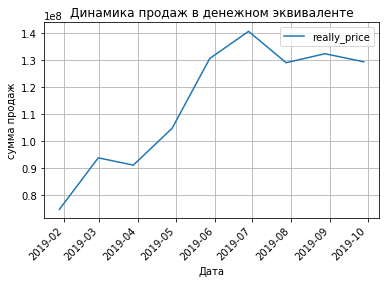

In [65]:
plt.figure(figsize=(10,40))
price_gr.plot(x = 'date', y = 'really_price', grid = True)
plt.xticks(rotation=45)
plt.title('Динамика продаж в денежном эквиваленте')
plt.xlabel('Дата')
plt.ylabel('сумма продаж')

Динамика по рынку в денежном и натуральном выражении положительная. Наибольшее количество автомобилей приобретаются летом.

### Динамика продаж по категориям (помесячно): тип топлива, класс, сегмент

In [66]:
#функция построения графиков динамики продаж
def func(cell):
    din_categ = new_data.pivot_table(index = ['date', cell], values = ['quantity'], aggfunc = 'sum').reset_index()
    plt.figure(figsize=(15,6))
    sns.lineplot(data=din_categ, x="date", y="quantity", hue=cell)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.title('Динамика продаж')
    plt.xlabel('Дата')
    plt.ylabel('Количество проданных автомобилей')


###### Тип топлива

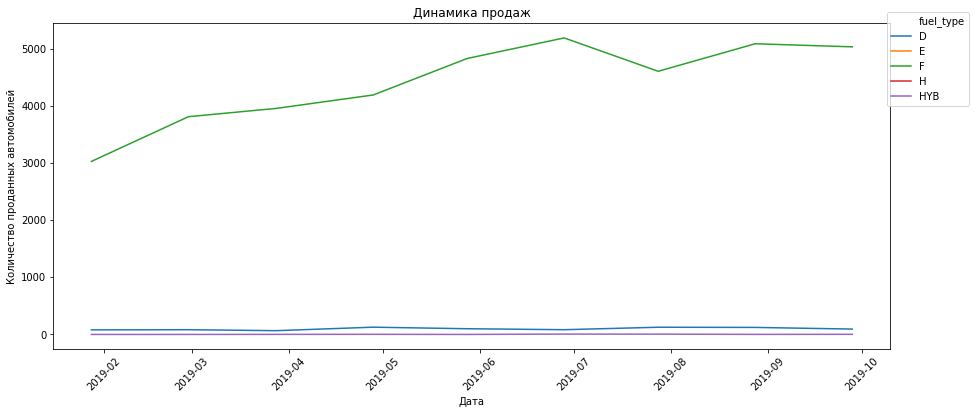

In [67]:
func('fuel_type')   

Самыми популярными являются автомобили на бензиновом топливе. На графике также видно увеличение количества проданных автомобилей в июне, июле и сентябре. Остальные виды топлива распределены равномерно по году.

###### Класс

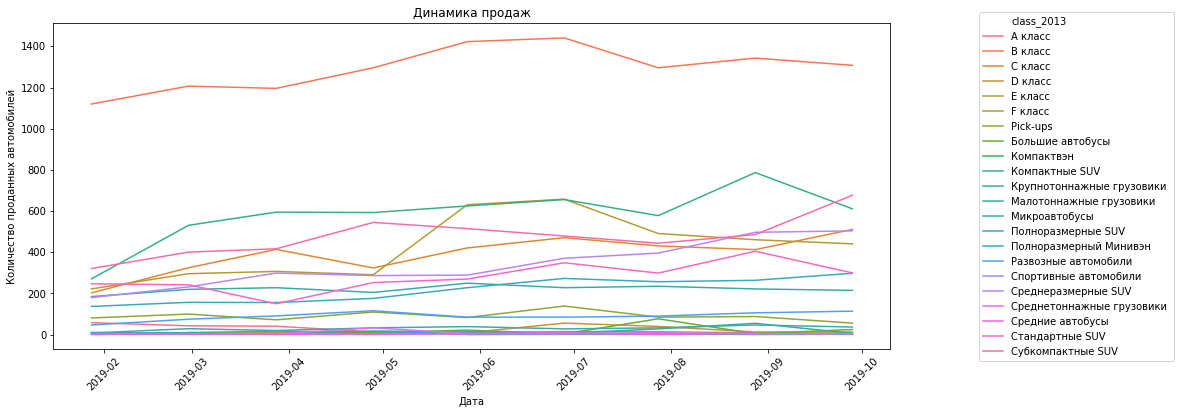

In [68]:
func('class_2013')   

На графике видны следующие закономерности: Самыми популярными являются автомобили B класса, однако начиная с июля наблюдается снижение количества проданных авто. С мая по июль возрастает спрос на автомобили E класса. C августа увеличивается количество продаж автомобилей класса 'Компактные SUV'.

###### Сегмент

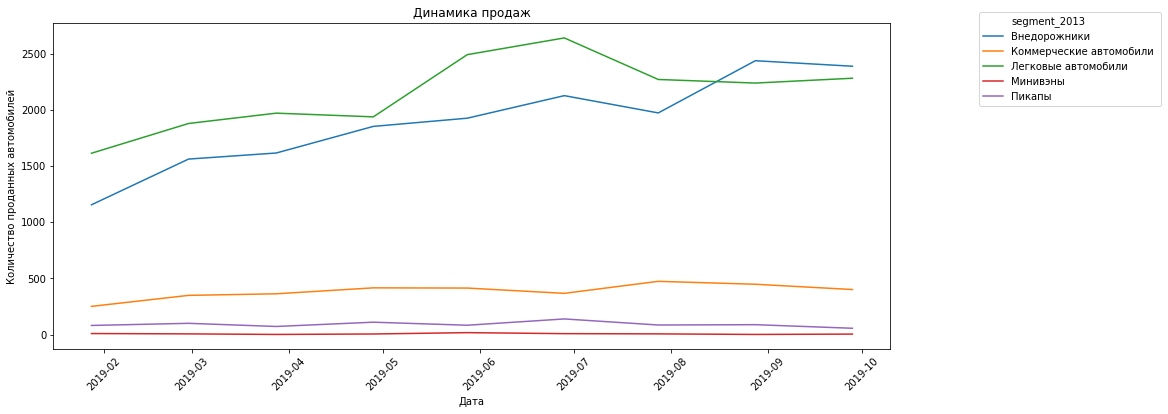

In [69]:
func('segment_2013')  

Гораздо чаще приобретают легковые автомобили и внедорожники. На легковые авто спрос возрастает с мая, на внедорожники с августа. Остальные сегменты покупают равномерно в течение года. Меньше всего приобретают пикапы и минивэны. 

### Продажи по регионам

In [70]:
reg_group = new_data.pivot_table(index = 'region', values = 'quantity', aggfunc = 'sum')\
            .reset_index().sort_values(by = 'quantity', ascending = False)

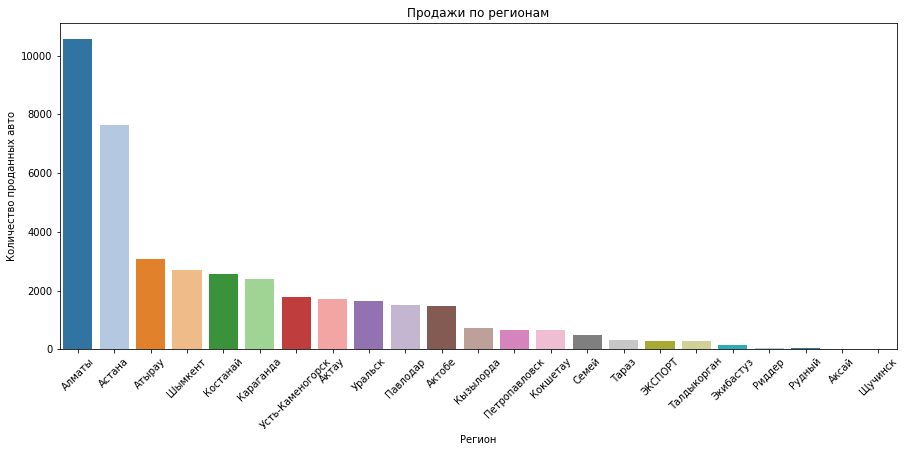

In [71]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'region', y = 'quantity', data=reg_group, palette=colors)
plt.xticks(rotation=45)
plt.title('Продажи по регионам')
plt.xlabel('Регион')
plt.ylabel('Количество проданных авто')
plt.show()

Наибольшее количество авто приобретают в Алматы и в Астане.

### Продажи по автоцентрам

In [72]:
company_group = new_data.pivot_table(index = 'company', values = 'quantity', aggfunc = 'sum')\
            .reset_index().sort_values(by = 'quantity', ascending = False)
company_group_10 = company_group.head(10)

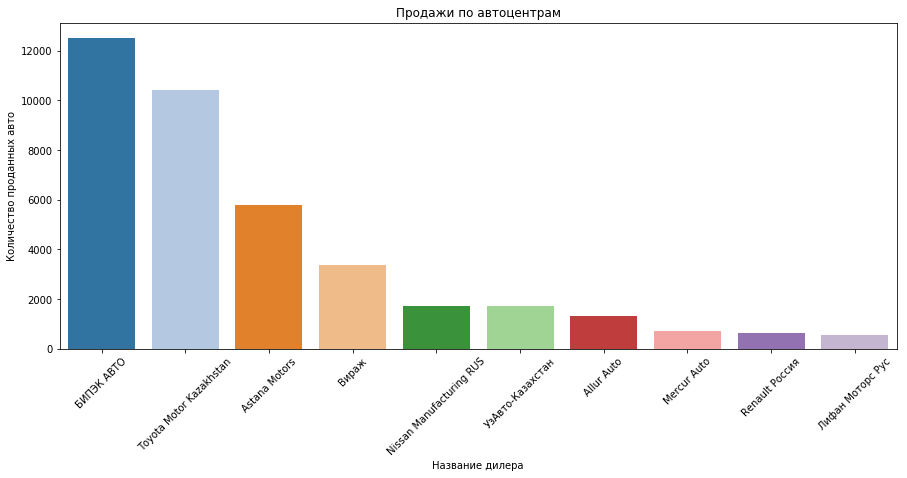

In [73]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'company', y = 'quantity', data=company_group_10, palette=colors)
plt.xticks(rotation=45)
plt.title('Продажи по автоцентрам')
plt.xlabel('Название дилера')
plt.ylabel('Количество проданных авто')
plt.show()

In [74]:
company_group_usd = new_data.pivot_table(index = 'company', values = 'really_price', aggfunc = 'sum')\
            .reset_index().sort_values(by = 'really_price', ascending = False)
company_group_usd_10 = company_group_usd.head(10)

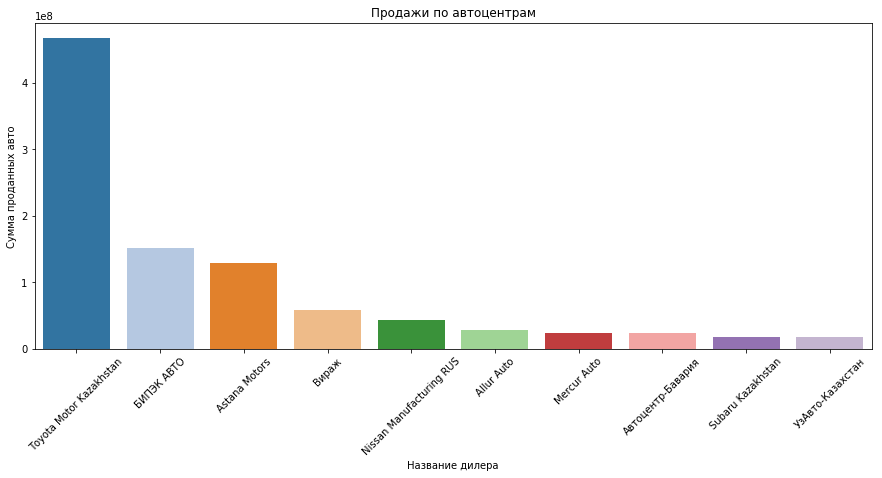

In [75]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'company', y = 'really_price', data=company_group_usd_10, palette=colors)
plt.xticks(rotation=45)
plt.title('Продажи по автоцентрам')
plt.xlabel('Название дилера')
plt.ylabel('Сумма проданных авто')
plt.show()

Лидером на рынке в денежном выражении является дилер 'Toyota Motor Kazakhstan', по количеству проданных автомобилей дилер БИПЭК АВТО. 'Mercur Auto' находится на 7 месте по сумме проданных авто и на 8 месте по количеству проданных авто.

### Cводные таблицы

In [76]:
pivot = new_data.pivot_table(index = ['class_2013', 'brand'],  values = 'quantity', aggfunc = 'sum').reset_index()
pivot.columns = ['Название класса', 'Модель', 'Количество авто']
pivot = pivot.sort_values(by = 'Название класса', ascending = False)
pivot.head(15)

,Название класса,Модель,Количество авто
157,Субкомпактные SUV,Suzuki,2
156,Субкомпактные SUV,SsangYong,3
155,Субкомпактные SUV,Renault,5
154,Субкомпактные SUV,Lifan,206
153,Субкомпактные SUV,Lada,2329
152,Субкомпактные SUV,Hyundai,1202
151,Субкомпактные SUV,Chevrolet,538
145,Стандартные SUV,Mitsubishi,96
141,Стандартные SUV,Audi,11
142,Стандартные SUV,BMW,73


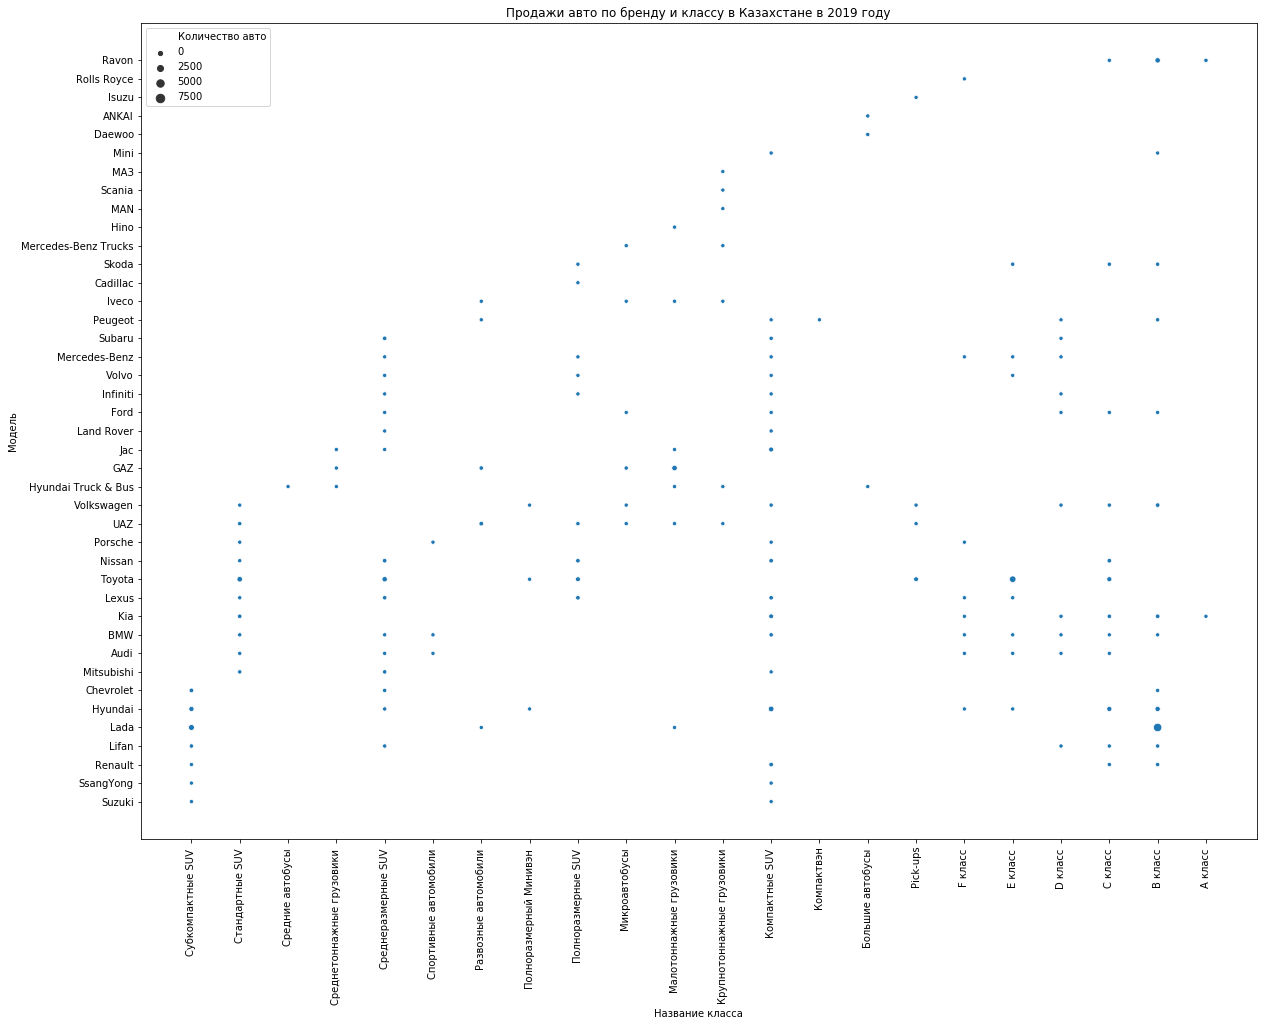

In [77]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=pivot, x="Название класса", y="Модель", size = 'Количество авто')
plt.xticks(rotation=90)
plt.title('Продажи авто по бренду и классу в Казахстане в 2019 году')
plt.show()

###### Вывод:
Проанализировав данные выше, можно выделить Toyota с бензиновым двигателем как самый продаваемый автомобиль. Гораздо чаще люди покупают автомобили летом и осенью. Предпочитаемыми городами для покупки являются Алматы и Астана. В топе у покупателей авто из сегмента 'Внедорожники' и 'Легковые авто'.

## Расчет показателей

Данный пункт проекта будет рассчитан для дилера 'Mercur Auto'. Отфильтруем данные по этому параметру.

In [78]:
mercur = new_data.query('company == "Mercur Auto"')
mercur.head(7)

,company,brand,model,year_of_release,country,fuel_type,volume_engine,gearbox,gearing,region,quantity,price_usd,really_price,segment_2013,class_2013,date
1,Mercur Auto,Audi,A3,2018,DEU,F,1.4,AMT,FWD,Алматы,1,30581,30581,Легковые автомобили,C класс,2019-05-28
2,Mercur Auto,Audi,A3,2018,DEU,F,1.4,AMT,FWD,Алматы,1,35087,35087,Легковые автомобили,C класс,2019-06-28
3,Mercur Auto,Audi,A3,2017,DEU,F,1.4,AMT,FWD,Алматы,1,26608,26608,Легковые автомобили,C класс,2019-07-28
4,Mercur Auto,Audi,A4,2017,DEU,F,2.0,AMT,4WD,Алматы,1,48343,48343,Легковые автомобили,D класс,2019-07-28
5,Mercur Auto,Audi,A5,2017,DEU,F,2.0,AMT,4WD,Алматы,1,52760,52760,Легковые автомобили,Спортивные автомобили,2019-06-28
6,Mercur Auto,Audi,A6,2017,DEU,F,2.0,AMT,4WD,Костанай,1,54288,54288,Легковые автомобили,E класс,2019-01-28
7,Mercur Auto,Audi,A6,2017,DEU,F,2.0,AMT,4WD,Алматы,1,54109,54109,Легковые автомобили,E класс,2019-01-28


### Прибыль и выручка

#### Прибыль и выручка за период

In [79]:
profit = mercur['really_price'].sum()
print('Общая прибыль дилера:', profit)

Общая прибыль дилера: 24323049


In [80]:
profit_brand = mercur.groupby('brand')['really_price'].agg('sum')
print('Прибыль дилера в зависимости от бренда:')
print(profit_brand)

Прибыль дилера в зависимости от бренда:
brand
Audi           6325033
Porsche        6547354
Volkswagen    11450662
Name: really_price, dtype: int32


In [81]:
mean_price = mercur['really_price'].mean()
print('Средняя стоимость продажи за период', round(mean_price, 2))

Средняя стоимость продажи за период 40742.13


In [82]:
mean_price_month = mercur.groupby('brand')['really_price'].agg('mean')
print('Cредняя стоимость в разбивке по маркам:')
print(round(mean_price_month,2))

Cредняя стоимость в разбивке по маркам:
brand
Audi           62010.13
Porsche       109122.57
Volkswagen     26323.36
Name: really_price, dtype: float64


Общая прибыль дилера составила 24323049 usd, половину которой составила прибыль от продажи авто Volkswagen (11450662 usd). Средняя стоимость продаж выше у Porshe, что логично, ведь это премиальный класс.

#### Прибыль и выручка помесячно: 

In [83]:
profit_month = mercur.pivot_table(index = 'date', values = 'really_price', aggfunc = 'sum').reset_index()

Text(0,0.5,'Прибыль')

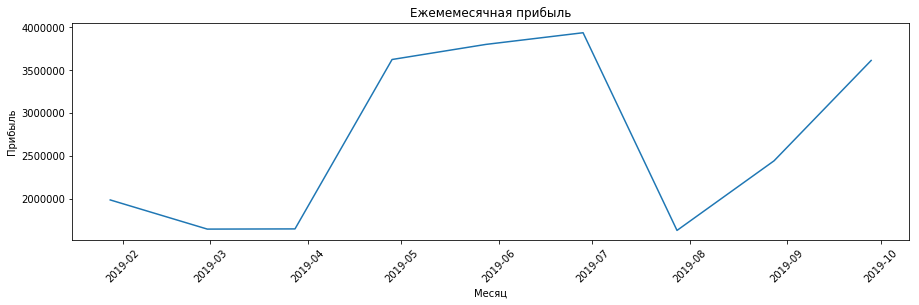

In [84]:
plt.figure(figsize=(15,4))
sns.lineplot(data=profit_month, x="date", y="really_price")
plt.xticks(rotation=45)
plt.title('Ежемемесячная прибыль')
plt.xlabel('Месяц')
plt.ylabel('Прибыль')

In [85]:
profit_month_brand = mercur.pivot_table(index = ['date', 'brand'], values = 'really_price', aggfunc = 'sum').reset_index()

Text(0,0.5,'Прибыль')

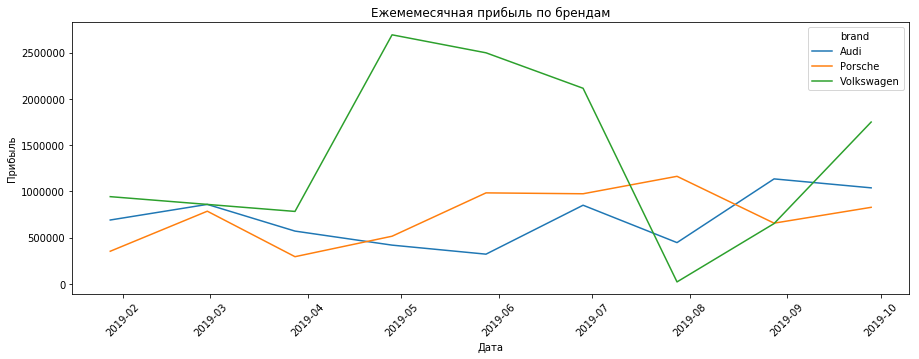

In [86]:
plt.figure(figsize=(15,5))
sns.lineplot(data=profit_month_brand, x="date", y="really_price", hue="brand")
plt.xticks(rotation=45)
plt.title('Ежемемесячная прибыль по брендам')
plt.xlabel('Дата')
plt.ylabel('Прибыль')

In [87]:
profit_avg_month = mercur.pivot_table(index = 'date', values = 'really_price', aggfunc = 'mean').reset_index()

Text(0,0.5,'Прибыль')

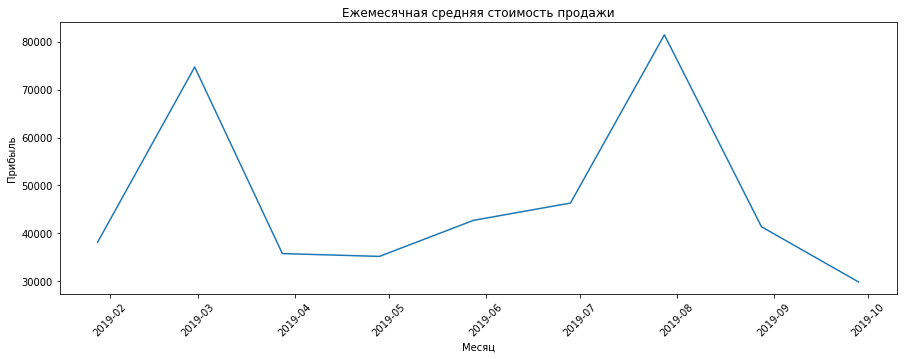

In [88]:
plt.figure(figsize=(15,5))
sns.lineplot(data=profit_avg_month, x="date", y="really_price")
plt.xticks(rotation=45)
plt.title('Ежемесячная средняя стоимость продажи')
plt.xlabel('Месяц')
plt.ylabel('Прибыль')

In [89]:
mean_month_brand = mercur.pivot_table(index = ['date', 'brand'], values = 'really_price', aggfunc = 'mean').reset_index()

Text(0,0.5,'Прибыль')

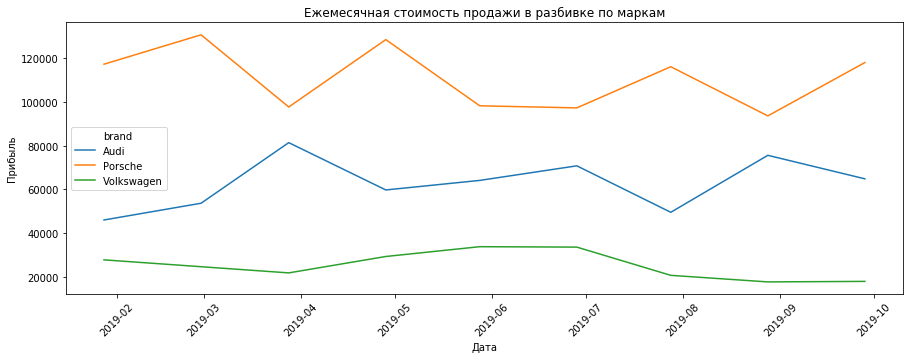

In [90]:
plt.figure(figsize=(15,5))
sns.lineplot(data=mean_month_brand, x="date", y="really_price", hue="brand")
plt.xticks(rotation=45)
plt.title('Ежемесячная стоимость продажи в разбивке по маркам')
plt.xlabel('Дата')
plt.ylabel('Прибыль')

Ежемесячная прибыль дилера 'Mercur Auto' была на пике с мая по июль, судя по графику прибыли по брендам, за счет продаж автомобилей Volkswagen. Ежемесячная средняя стоимость продажи имеет максимумы в марте и августе, в эти месяца были совершены покупки Porshe.

### Рынок

#### Емкость рынка

In [91]:
capacity = new_data['really_price'].sum()
print('Фактическая емкость рынка:', capacity)

Фактическая емкость рынка: 1025943485


In [92]:
capacity_prediction = capacity*1.25
print('Прогнозная емкость рынка:', capacity_prediction)

Прогнозная емкость рынка: 1282429356.25


#### Емкость сегментов рынка (по маркам и типам авто)

In [93]:
capacity_brand = new_data.pivot_table(index = 'brand', values = 'really_price', aggfunc = 'sum')
capacity_brand.columns = ['capacity_brand']
capacity_brand = capacity_brand.sort_values(by = 'capacity_brand', ascending = False)
capacity_brand.head(10)

,capacity_brand
brand,
Toyota,383870499
Hyundai,124844281
Lada,93870615
Lexus,83284417
GAZ,40419557
Nissan,36987754
Kia,36750897
BMW,23313011
Subaru,17311252


In [94]:
capacity_segment = new_data.pivot_table(index = 'segment_2013', values = 'really_price', aggfunc = 'sum')
capacity_segment.columns = ['capacity_segment']
capacity_segment = capacity_segment.sort_values(by = 'capacity_segment', ascending = False)
capacity_segment.head(10)

,capacity_segment
segment_2013,
Внедорожники,563600581
Легковые автомобили,341755324
Коммерческие автомобили,91136731
Пикапы,27125695
Минивэны,2325154


### Доля рынка

#### Общая доля рынка дилера в количественном и стоимостном выражении

In [95]:
#Функция расчета доли рынка дилера
def part(name):
    pivot_table = new_data.query('company == @name')
    part_qty = (pivot_table['quantity'].sum() / new_data['quantity'].sum()) * 100
    print('Доля рынка в количественном выражении:', round(part_qty, 2))
    part_usd = (pivot_table['really_price'].sum() / new_data['really_price'].sum()) * 100
    print('Доля рынка в денежном выражении:', round(part_usd, 2))


part('Mercur Auto')    

Доля рынка в количественном выражении: 1.77
Доля рынка в денежном выражении: 2.37


Дилер Mercur Auto занимает только 1,77% доли рынка в количественном выражении и 2,37% в стоимостном выражении

#### Доля рынка дилера по маркам

In [96]:
mercur['brand'].unique()

array(['Audi', 'Porsche', 'Volkswagen'], dtype=object)

In [97]:
all_company = new_data.query('brand in ["Audi", "Porsche", "Volkswagen"]')

In [98]:
part_brand =  (mercur['quantity'].sum()/all_company['quantity'].sum())*100
part_brand

100.0

In [99]:
part_brand_usd =  (mercur['really_price'].sum()/all_company['really_price'].sum())*100
part_brand_usd

100.0

Mercur Auto является единственным дилером в Казахстане, который продает автомобили марок Ауди, Порш и Фольксваген.

#### Посчитать долю рынка дилера по типам машин

In [100]:
mercur['segment_2013'].unique()

['Легковые автомобили ', 'Внедорожники ', 'Пикапы ', 'Минивэны', 'Коммерческие автомобили ']
Categories (5, object): ['Легковые автомобили ', 'Внедорожники ', 'Пикапы ', 'Минивэны', 'Коммерческие автомобили ']

In [101]:
type = ['Легковые автомобили ', 'Внедорожники ', 'Пикапы ', 'Минивэны', 'Коммерческие автомобили ']
for i in type:
    car_mercur = mercur.query('segment_2013 == @i')['really_price'].sum()
    car_total = new_data.query('segment_2013 == @i')['really_price'].sum()
    part_car = car_mercur*100/car_total
    print('Доля рынка', i, round(part_car, 2))
    
    

Доля рынка Легковые автомобили  4.11
Доля рынка Внедорожники  1.71
Доля рынка Пикапы  1.04
Доля рынка Минивэны 13.15
Доля рынка Коммерческие автомобили  0.04


Минивэны занимают большую долю рынка в денежном выражении (13%) по сравнению с другими типами машин.

### Конкуренты

Выведем сводную таблицу по всем дилерам, которые присутствуют в датасете

In [102]:
company_group = new_data.pivot_table(index = 'company', \
                                     values = ['quantity', 'region', 'really_price'], \
                                     aggfunc={'quantity': 'sum', 'region': 'nunique', 'really_price': 'mean'})
company_group.columns = ['Количество проданных авто', 'Средняя цена покупки', 'Количество регионов с автосалонами']
company_group = company_group.sort_values(by = ['Количество проданных авто', 'Средняя цена покупки'], ascending = False)
company_group

,Количество проданных авто,Средняя цена покупки,Количество регионов с автосалонами
company,,,
БИПЭК АВТО,12510,45039.208160,20
Toyota Motor Kazakhstan,10425,44811.023118,15
Astana Motors,5779,22425.561978,16
Вираж,3358,17306.512507,18
Nissan Manufacturing RUS,1739,42331.768102,11
УзАвто-Казахстан,1727,9929.484655,20
Allur Auto,1304,21520.986963,18
Mercur Auto,723,40742.125628,6
Renault Россия,633,13168.995261,14


Явными конкурентами являются лидеры рынка Toyota Motor Kazakhstan и БИПЭК АВТО. Посмотрим их долю на рынке.

In [103]:
part('БИПЭК АВТО')

Доля рынка в количественном выражении: 30.71
Доля рынка в денежном выражении: 14.74


In [104]:
part('Toyota Motor Kazakhstan')

Доля рынка в количественном выражении: 25.59
Доля рынка в денежном выражении: 45.53


Здесь, конечно, существенные доли рынка. Посмотрим ближайших конкурентов Allur Auto, Nissan Manufacturing RUS и Автоцентр-Бавария.

In [105]:
part('Allur Auto')

Доля рынка в количественном выражении: 3.2
Доля рынка в денежном выражении: 2.74


In [106]:
part('Nissan Manufacturing RUS')

Доля рынка в количественном выражении: 4.27
Доля рынка в денежном выражении: 4.22


In [107]:
part('Автоцентр-Бавария')

Доля рынка в количественном выражении: 0.95
Доля рынка в денежном выражении: 2.36


In [108]:
company_group.query('company in ["Allur Auto", "Mercur Auto", "Nissan Manufacturing RUS", "Автоцентр-Бавария"]')

,Количество проданных авто,Средняя цена покупки,Количество регионов с автосалонами
company,,,
Nissan Manufacturing RUS,1739,42331.768102,11
Allur Auto,1304,21520.986963,18
Mercur Auto,723,40742.125628,6
Автоцентр-Бавария,388,123021.380711,5


###### Сравнение с Allur Auto.

У Mercur auto в два раза меньше проданных машин, в два раза выше средний чек покупки. B 3 раза больше регионов, в которых находятся автоцентры. Выше доля рынка в количественном выражении и примерно одинаковая доля в денежном выражении.


###### Сравнение с Nissan Manufacturing RUS.

У Nissan Manufacturing RUS почти в 3 раза больше проданных машин, почти в два раза больше регионов с автосалонами и примерно одинаковый средний чек. Доля рынка выше во всех выражениях.


###### Сравнение с Автоцентр Бавария.

Количество проданных машин в два раза меньше, но средний чек в 3 раза больше. Количество регионов с автосалонами примерно одинаковое. Доли рынка в денежном выражении примерно равны.

## Вывод:

Был проведен анализ базы данных о продажах автомобилей в Казахстане в 2019 году. 
В результате анализа была выполнена масштабная предобработка данных, в ходе которой удалены столбцы, не влияющие на результат анализ, удалены строки с пропущенными значениями (процент потерянных данных - 8%), изменены типы данных, устранены неявные дубликаты, устранены аномальные значения. Также в общую таблицу был добавлен столбец, содержащий информацию о дате покупки.

Лидером на рынке Казахстана по количеству купленных автомобилей являются автомобили Lada, в денежном выражении - автомобили марки Toyota. Также в топ-5 марок входят Hyundai, GAZ, Lada. Lexus в топе в денежном выражении, а Kia в натуральном выражении.

Анализируя продажи в динамике получились следующие выводы:  Самыми популярными являются автомобили B класса, однако начиная с июля наблюдается снижение количества проданных авто. С мая по июль возрастает спрос на автомобили E класса. C августа увеличивается количество продаж автомобилей класса 'Компактные SUV'. Самыми популярными являются автомобили на бензиновом топливе. На графике также видно увеличение количества проданных автомобилей в июне, июле и сентябре. Автомобили на других видах топлива распределены равномерно по году. Наибольшее количество авто приобретают в Алматы и в Астане.

Анализ дилера Mercur Auto показал следующие результаты: 
Общая прибыль дилера за 2019 год составила 24323049 usd, половину которой составила прибыль от продажи авто Volkswagen (11450662 usd). Средняя стоимость продаж выше у Porshe, что логично, ведь это премиальный класс. Ежемесячная прибыль дилера 'Mercur Auto' была на пике с мая по июль, судя по графику прибыли по брендам, за счет продаж автомобилей Volkswagen. Ежемесячная средняя стоимость продажи имеет максимумы в марте и августе, в эти месяца были совершены покупки Porshe.
Данный дилер имеет 100% долю рынка по продажам автомобилей моделей Audi, Porsche, Volkswagen.
Ближайшими конкурентами являются дилеры - Allur Auto, Nissan Manufacturing RUS и Автоцентр-Бавария.

Рекомендации дилеру как увеличить долю на рынке:
 * расширить модельный ряд автомобилей;
 * открыть автосалоны в новых регионах;
 * разработать программа лояльности для удержания клиентов;
 * запустить рекламу для привлечения клиентов.